### **Content License Agreement**

<font color='red'><b>**WARNING**</b></font> : 본 자료는 삼성청년SW·AI아카데미의 컨텐츠 자산으로, 보안서약서에 의거하여 어떠한 사유로도 임의로 복사, 촬영, 녹음, 복제, 보관, 전송하거나 허가 받지 않은 저장매체를 이용한 보관, 제3자에게 누설, 공개 또는 사용하는 등의 무단 사용 및 불법 배포 시 법적 조치를 받을 수 있습니다.

# **Objectives**

1. 실습 개요
  - 본 실습은 이미지 파운데이션 모델(Image Foundation Models)의 활용과 비교를 중심으로 Text-to-Image 생성, CLIP 기반 이미지 평가, CNN 기반 모델(ResNet) 비교, 생성 데이터로 ResNet18 전이 학습 (리니어 프로빙) 의 전체 워크플로우를 경험합니다.

2. 실습 진행 목적 및 배경
  - 파운데이션 모델 이해: Stable Diffusion, CLIP, ResNet 등 다양한 사전 학습 모델의 개념과 활용 방법을 익히고, 생성형·인식형 모델의 차이를 파악합니다.
  - 멀티모달 융합 실습: 텍스트와 이미지를 동시에 다루는 CLIP 모델을 활용하여 생성 이미지의 의미적 적합성을 평가합니다.
  - 전이 학습(Transfer Learning)과 생성 데이터 활용: Stable Diffusion으로 생성한 이미지를 ResNet18 모델 학습에 활용하여, 생성 데이터의 가치를 탐구합니다.
  - 모델 비교 분석 능력 향상: CLIP과 전통 CNN의 분류 결과를 비교하여 모델 특성과 성능 차이를 이해합니다.

3. 실습 수행으로 얻어갈 수 있는 역량
  - 프롬프트 엔지니어링: 생성형 모델에 효과적인 positive/negative prompt 작성 능력.
  - 멀티모달 평가:
    - CLIP을 사용하여 이미지와 텍스트 간 유사도를 측정·해석하는 기술.
    - CLIP 모델과 ResNet 모델의 비교.
  - CNN 활용 능력: ResNet 계열 모델 불러오기, 전이 학습 (리니어 프로빙) 구현.
  - 데이터 생성 및 확장 전략: 생성 데이터 제작·활용을 통한 데이터 부족 문제 대응 방법.


4. 실습 핵심 내용
  - HuggingFace Stable Diffusion 모델로 컨셉 기반 이미지 생성 (Positive Prompt + Negative Prompt 활용)
  - CLIP 모델로 생성 이미지와 사용자 정의 레이블 간 의미적 유사도 평가
  - ResNet-50으로 동일 이미지 분류 후 CLIP 결과와 비교
  - Stable Diffusion으로 생성한 합성 데이터셋을 사용해 ResNet-18 전이 학습 (리니어 프로빙)


# **Prerequistes**
```bash
torch:  2.6.0+cu124
torchvision:  0.21.0+cu124
diffusers:  0.34.0
PIL:  11.3.0
transformers:  4.55.1
```

In [ ]:
!pip install --upgrade torch==2.6.0+cu124 torchvision==0.21.0+cu124 diffusers==0.34.0 transformers==4.45.2 accelerate==0.34.2 safetensors==0.4.5 Pillow==11.3.0 --extra-index-url https://download.pytorch.org/whl/cu124


Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu124
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━


# **Exercise Overview**

### **들어가며: 파운데이션 모델 (Foundation Model)**

대규모 데이터와 컴퓨팅 자원으로 사전 학습(pre-training)된, 범용적인 인공지능 모델. 특정 태스크에 맞춘 모델이 아니라, 다양한 분야로 전이(Transfer)하여 활용할 수 있도록 설계됨.
- 특징
  - 대규모 학습 데이터: 수억~수십억 개의 이미지·텍스트·멀티모달 데이터 사용.
  - 범용성: 추가 학습 없이도 여러 다운스트림 작업에 적용 가능.
  - 전이 학습 효율성: 소량 데이터로도 fine-tuning 가능.
- 예시
  - 언어: GPT, BERT
  - 비전: ViT, ResNet (사전학습 버전), CLIP
  - 멀티모달: CLIP(ex. 이 이미지와 이 문장이 얼마나 관련이 있는가?), BLIP(ex. 이 이미지를 설명하는 문장을 만들어라.)
  - 생성형: Stable Diffusion, DALL·E

### **실습 목차**

이 노트북은 네 가지 주요 파트로 구성되어 있습니다.

1. Stable Diffusion 모델로 컨셉 기반 이미지 생성 (Positive Prompt + Negative Prompt 활용)
2. CLIP 모델로 생성 이미지와 사용자 정의 레이블 간 의미적 유사도 평가
3. ResNet-50으로 동일 이미지 분류 후 CLIP 결과와 비교
4. Stable Diffusion으로 생성한 합성 데이터셋을 사용해 ResNet-18 전이 학습 (리니어 프로빙)


먼저 실습 전에 재현성을 위하여 PyTorch, NumPy, 그리고 Python 의 random 모듈에 대한 시드를 설정합니다.

In [ ]:
# --- 라이브러리 임포트 ---
import numpy as np
import random
import torch

# --- 시드 고정 ---
# PyTorch의 CPU 연산 시드 고정
torch.manual_seed(42)
# PyTorch의 GPU 연산 시드 고정
torch.cuda.manual_seed(42)
# NumPy의 난수 시드 고정
np.random.seed(42)
# Python 내장 random 모듈의 시드 고정
random.seed(42)

# CuDNN 관련 설정 (GPU 연산의 재현성을 위함)
# 결정론적 알고리즘을 사용하도록 설정하여 실행 시마다 동일한 결과를 보장
torch.backends.cudnn.deterministic = True
# 내장된 벤치마크 기능을 비활성화하여 재현성 유지
torch.backends.cudnn.benchmark = False

## **1. 텍스트-투-이미지 생성**

**Stable Diffusion** : 텍스트 설명(프롬프트)을 입력받아 이미지를 생성하는 텍스트-투-이미지(Text-to-Image) 생성형 파운데이션 모델로, 이미지 생성 절차는 다음과 같습니다.
CLIP의 텍스트 인코더 부분을 프롬프트 인코딩용으로 사용

학습 절차: 실제 이미지를 노이즈를 더해가며 가우시안 노이즈에 가까운 노이즈로 만들고 이를 다시 복원하는 과정

이미지 생성 절차: 노이즈가 가득한 랜덤 이미지에서 시작 -> 텍스트 조건에 맞게 점진적으로 노이즈를 제거(노이즈가 얼마나 섞였는지를 예측하고 그만큼을 빼며 텍스트의 의미 방향의 벡터로 정제하는 과정)(diffusion process) -> 최종적으로 디코더로 변환해 프롬프트와 일치하는 이미지를 생성.



텍스트 설명으로부터 이미지를 생성하기 위해 HuggingFace의 Diffusers 라이브러리를 사용하여 Stable Diffusion 파이프라인을 로드합니다. 원하는 이미지의 핵심 컨셉을 정하고, 이를 잘 표현하는 프롬프트(positive prompt)를 작성합니다. 이때 특정 화풍이나 분위기 키워드를 포함하여 이미지를 개인화하고 독특하게 만들어봅니다. 또한 이미지에서 배제하고 싶은 요소들은 네거티브 프롬프트(negative prompt)로 지정합니다. 예를 들어, "낮은 해상도", "블러 처리", "왜곡된 형태" 등의 키워드를 negative prompt에 넣어 이미지를 개선할 수 있습니다.

- positive prompt
→ 모델이 생성 시 끌어당기길 원하는 방향의 벡터.
즉, 내적(dot product) 이 크거나 코사인 유사도(cosine similarity) 가 높은 방향입니다.
→ “이런 특성을 더 포함해라.”

- negative prompt
→ 모델이 멀어지길 원하는 방향, 즉 특정 속성을 배제하거나 억제하는 벡터.
→ 내적이 작거나, 유사도가 낮은 방향으로 이동합니다.
→ “이런 특성은 제거해라.”

아래 코드는 Stable Diffusion 모델을 로드하고, positive/negative 프롬프트를 사용해 이미지를 생성하는 예시입니다.


사용 중인 장치: cuda


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

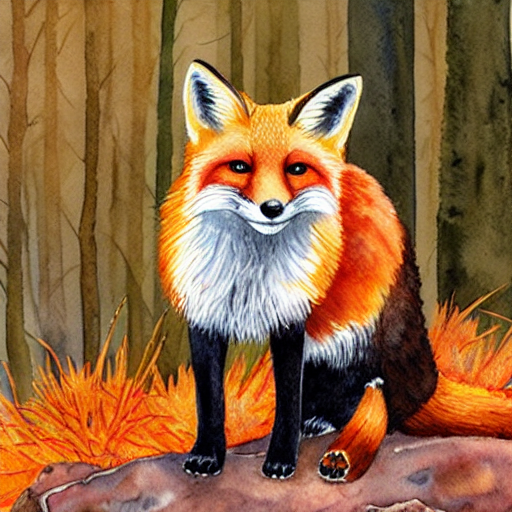

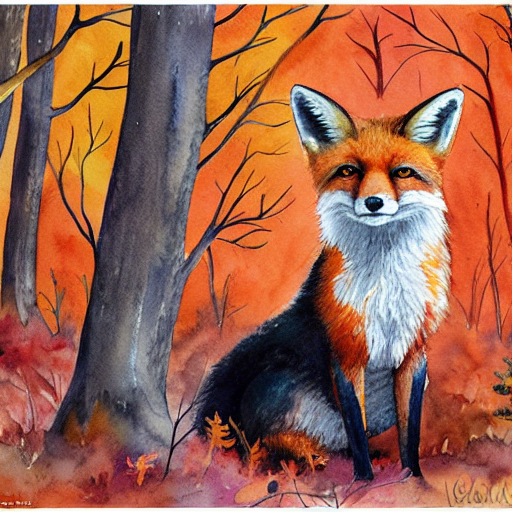

In [ ]:
# 'diffusers' 라이브러리에서 이미지 생성 파이프라인을 가져옵니다.
from diffusers import StableDiffusionPipeline
# 딥러닝 프레임워크인 파이토치를 가져옵니다.
import torch

# --- 장치 설정 ---
# torch.cuda.is_available() 함수는 GPU 사용이 가능한지 확인
# 가능하면 'cuda' (GPU)를, 불가능하면 'cpu'를 device 변수에 할당
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("사용 중인 장치:", device)


# --- HuggingFace에서 Stable Diffusion 모델 불러오기 ---
# 'runwayml/stable-diffusion-v1-5'는 공개적으로 사용 가능한 모델의 ID입니다.
# 문제가 있을 시, 'sd-legacy/stable-diffusion-v1-5' 로 변경해보세요.
model_id = "runwayml/stable-diffusion-v1-5"

# 문제 1: StableDiffusionPipeline 을 호출하여 pipeline 객체를 생성합니다.
# [START CODE]
# from_pretrained 메소드: 미리 학습된 모델을 다운로드하고 로드합니다.
# torch_dtype=torch.float16: 모델의 가중치를 16비트 부동소수점(float16) 형식으로 로드하여
# 메모리 사용량을 줄이고 계산 속도를 높입니다. (GPU에서 효과적)
pipe = StableDiffusionPipeline.from_pretrained(
    model_id, torch_dtype=torch.float16
)
# [END CODE]
pipe = pipe.to(device)


# --- 이미지 생성을 위한 프롬프트 설정 ---
# positive_prompt: 생성하고 싶은 이미지의 내용을 상세하게 기술합니다.
# "가을 색감이 선명한 숲 바닥에 앉아있는 붉은 여우의 수채화" (한글로 작성할 시 모델의 출력이 이상해질 수 있습니다.)
positive_prompt = "A watercolor painting of a red fox sitting on a forest floor, vibrant autumn colors"

# negative_prompt: 이미지에 나타나지 않았으면 하는 요소들을 기술합니다.
# "저품질, 흐릿함, 왜곡됨, 텍스트"
negative_prompt = "low quality, blurry, distorted, text"

# 문제 2: pipe 객체를 호출하여 이미지를 생성합니다.
# [START CODE]
# --- 이미지 생성 실행 ---
# 파이프라인 객체(pipe)를 호출하여 이미지를 생성합니다.
# 이미지를 2장 생성 (num_images_per_prompt 설정)하고 결과를 PIL 이미지 리스트로 반환
result = pipe(
    positive_prompt,                  # 위에서 정의한 긍정 프롬프트
    negative_prompt=negative_prompt,  # 위에서 정의한 부정 프롬프트

    # guidance_scale: 생성된 이미지가 프롬프트를 얼마나 강하게 따를지 결정하는 값.
    # 값이 높을수록 프롬프트 내용을 충실히 반영하지만, 너무 높으면 부자연스러워질 수 있습니다.
    guidance_scale=7.5,

    # num_inference_steps: 노이즈를 제거하는 단계 수.
    # 단계가 많을수록 이미지 품질이 높아지지만 생성 시간이 길어집니다.
    num_inference_steps=50,

    # num_images_per_prompt: 한 번의 요청으로 생성할 이미지의 개수입니다.
    num_images_per_prompt=2,
)
# [END CODE]

# 생성 결과에서 이미지 객체만 추출합니다. 결과는 PIL 이미지 객체들의 리스트입니다.
images = result.images


# --- 생성된 이미지 저장 및 출력 ---
# enumerate 함수는 리스트의 인덱스와 값을 함께 반환합니다. (예: 0, img0), (1, img1)...
for i, img in enumerate(images):
    # .save(): PIL 이미지 객체를 파일로 저장합니다.
    img.save(f"generated_image_{i}.png")
    # display(): 주피터 노트북이나 Colab 환경에서 이미지를 직접 보여줍니다.
    display(img)

### API 활용

다음의 링크에서 노이즈가 점점 이미지로 바뀌어가는 과정도 확인할 수 있습니다.
- https://huggingface.co/spaces/black-forest-labs/FLUX.1-Krea-dev

# **2. CLIP 모델을 사용한 생성 이미지 평가**

성된 이미지가 의도한 컨셉과 부합하는지 CLIP 모델을 사용하여 평가합니다. CLIP은 이미지와 텍스트를 같은 임베딩 공간에 투영하여 유사도를 계산하는 모델입니다.

여기서는 OpenAI의 CLIP (ViT-B/32) 모델을 사용하고, HuggingFace의 CLIPProcessor를 통해 이미지와 텍스트를 전처리합니다.


먼저 우리가 생성한 이미지의 내용에 맞는 정답 레이블 한 개와, 모델이 혼동할 법한 오답 레이블 몇 개를 정합니다. 예를 들어, 위에서 수채화 스타일 여우 그림을 생성했다면
- 정답 레이블:
  - "a watercolor painting of a fox" (수채화 여우 그림)
- 오답 레이블:
  - "a watercolor painting of a dog" (다른 동물),
  - "an oil painting of a fox" (다른 화풍),
  - "a photo of a fox" (사진 스타일) 등.

CLIP 모델에 이미지를 입력하고 이러한 텍스트 레이블들을 입력하면, 이미지와 각 텍스트 간의 유사도 점수(dot product에 기반)를 얻을 수 있습니다. 이 점수를 비교하여 가장 높은 것이 모델이 예측한 레이블입니다.


예를 들어 수채화 여우 그림의 경우, CLIP 모델은 "a watercolor painting of a fox"에 높은 유사도 점수를 부여하고 다른 문구들(개 그림, 기름물감 화풍, 사진 등)보다 더 적합한 설명으로 선택할 것입니다. 이런 방식으로 CLIP을 활용하면 별도 학습 없이도 이미지가 어떤 텍스트 설명과 가장 어울리는지 알 수 있어, 생성된 이미지의 내용이 의도와 맞는지 평가할 수 있습니다

In [ ]:
# PIL(Pillow) 라이브러리에서 이미지 처리를 위한 Image 모듈을 가져옵니다.
from PIL import Image
# PyTorch 을 불러옵니다.
import torch
# 'transformers' 라이브러리에서 CLIP 모델과 전처리기(Processor)를 가져옵니다.
from transformers import CLIPProcessor, CLIPModel

# --- 평가할 이미지 불러오기 ---
# 위에서 생성하고 저장한 첫 번째 이미지를 엽니다.
image = Image.open("generated_image_0.png")

# --- 평가에 사용할 텍스트 레이블 정의 ---
# 이미지와 비교할 문장들의 리스트를 만듭니다.
labels = [
    "a watercolor painting of a fox",   # 정답 (우리가 의도한 레이블)
    "a watercolor painting of a dog",   # 오답 후보 1 (동물만 다름)
    "an oil painting of a fox",         # 오답 후보 2 (화풍만 다름)
    "a photo of a fox"                  # 오답 후보 3 (스타일이 사진으로 다름)
]


# --- CLIP 모델과 전처리기(Processor) - (ViT-B/32 모델 사용) 로드 ---
# 'openai/clip-vit-base-patch32'는 공개된 CLIP 모델의 ID입니다.

# CLIPProcessor: 이미지와 텍스트를 모델이 이해할 수 있는 숫자 형태(텐서)로 변환하는 역할을 합니다.
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# CLIPModel: 실제 이미지와 텍스트의 특징을 추출하고 유사도를 계산하는 모델입니다.
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)


# 문제 3: processor를 사용하여 이미지와 텍스트 레이블을 전처리합니다.
# --- 이미지와 텍스트 전처리 ---
# processor를 사용해 이미지와 텍스트 레이블들을 모델 입력 형식에 맞게 변환합니다.
# return_tensors="pt": 결과를 파이토치 텐서(Tensor)로 반환하라는 의미입니다.
# padding=True: 문장들의 길이를 맞추기 위해 짧은 문장 뒤에 특수 토큰을 추가합니다.
# [START CODE]
inputs = processor(text=labels, images=image, return_tensors="pt", padding=True).to(device)
# [END CODE]

# 문제 4: CLIP 모델로 이미지-텍스트 유사도 계산
# --- CLIP 모델로 이미지-텍스트 유사도 계산 ---
# [START CODE]
# torch.no_grad(): 모델의 가중치를 업데이트하지 않도록 하여(학습이 아님) 순수 추론만 수행합니다.
# CLIP 모델로 이미지-텍스트 유사도 계산
with torch.no_grad():
    # 모델에 전처리된 데이터를 입력합니다. **inputs는 딕셔너리 형태의 입력을 풀어 전달합니다.
    outputs = model(**inputs)

    # logits_per_image: 이미지 한 장당 각 텍스트 레이블과의 유사도 점수를 담고 있습니다.
    logits_per_image = outputs.logits_per_image

    # .softmax(dim=1): 유사도 점수를 확률 값으로 변환합니다. 모든 확률의 합은 1이 됩니다.
    # dim=1은 각 텍스트 레이블에 대한 차원을 의미합니다.
    probs = logits_per_image.softmax(dim=1)
# [END CODE]


# .cpu().numpy(): GPU에 있는 텐서를 CPU로 옮긴 후, NumPy 배열로 변환하여 출력합니다.
print("CLIP similarity scores:", logits_per_image.cpu().numpy())
print("CLIP predicted probabilities:", probs.cpu().numpy())

# .argmax(dim=1): 가장 높은 점수를 가진 레이블의 인덱스를 찾습니다.
# .item(): 텐서에서 숫자 값만 추출합니다.
best_idx = logits_per_image.argmax(dim=1).item()
print(f"CLIP 예측 결과: '{labels[best_idx]}' 라벨이 가장 타당하다고 예측되었습니다.")

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

CLIP similarity scores: [[31.326557 23.707544 33.4329   28.929611]]
CLIP predicted probabilities: [[1.07415855e-01 5.27440134e-05 8.82757127e-01 9.77435149e-03]]
CLIP 예측 결과: 'an oil painting of a fox' 라벨이 가장 타당하다고 예측되었습니다.


# **3. ResNet50 기반 모델과의 결과 비교**

이제 동일한 이미지를 전통적인 CNN 분류 모델인 ResNet-50을 사용하여 분류하고, CLIP의 결과와 비교해봅니다. ResNet-50은 ImageNet 데이터셋(1000개 카테고리)으로 사전 학습된 모델이며, 미리 정의된 레이블 중 가장 가능성이 높은 것을 예측합니다. ResNet과 CLIP의 주요 차이는 ResNet은 고정된 1000개 객체 범주 중에서만 선택하며, 화풍이나 문맥은 고려하지 못한다는 점입니다. 반면 CLIP은 임의의 텍스트 라벨과 비교하므로 이미지의 스타일이나 상황까지도 텍스트에 반영하여 평가할 수 있습니다.

예를 들어 위에서 생성한 수채화 여우 그림에 대해 CLIP은 "수채화 여우 그림" vs "수채화 개 그림" vs "사진 여우" 등을 비교해 내용과 스타일 모두 맞는 "수채화 여우 그림"을 고를 수 있었습니다.
ResNet-50은 ImageNet의 레이블(예: 여우, 개 등)만으로 판단하기 때문에, 화풍에 상관없이 이미지의 주된 객체가 여우라면 여우류의 클래스로 예측할 것입니다 (예: "kit fox", "red fox" 등). 스타일에 대한 구분은 출력 라벨에 없으므로 하지 못합니다.

PyTorch의 torchvision에 내장된 ResNet-50 모델을 사용하여 이미지를 분류해봅니다.

ImageNet의 클래스 이름 매핑을 위해 미리 준비된 레이블 리스트를 사용합니다.

데이터를 준비된 ResNet-50 모델에 맞게 변형해야 합니다. `torchvision.transforms` 모듈을 사용해 데이터를 전처리합니다.
- 리사이즈: 데이터를 ResNet-50 의 입력 크기에 맞게 (224x224) 으로 조정합니다.
- 정규화: 데이터를 모델이 학습했던 데이터에 맞게 정규화해줍니다. 모델이 학습한 ImageNet 의 평균은 `[0.485, 0.456, 0.406]` 이고, 표준편차는 `[0.229, 0.224, 0.225]` 입니다.


데이터가 준비되면 ResNet-50을 통해 입력 이미지에 대해 가장 높은 확률의 클래스를 예측합니다.
위에서 생성한 이미지 (수채화 스타일 여우 그림)에 대해 ResNet은 여우 관련 클래스를 최고 확률로 내놓을 것입니다 (예: "red fox, kit fox(사막여우)" 등이 ImageNet 클래스에 있음).

In [ ]:
from torchvision import transforms
from torchvision import models


# 문제 5: 사전 학습된 ResNet-50 모델 로드
# --- 사전 학습된 ResNet-50 모델 로드 ---
# [START CODE]
# models.resnet50: ResNet-50 모델 구조를 가져옵니다.
# weights=models.ResNet50_Weights.IMAGENET1K_V2: ImageNet 데이터셋으로 학습된 가중치를 함께 로드합니다.
resnet50 = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2).to(device)

# .eval(): 모델을 평가(evaluation) 모드로 설정합니다.
# 이 모드에서는 드롭아웃(Dropout)이나 배치 정규화(Batch Normalization) 등이 비활성화되어 일관된 예측 결과를 보장합니다.
resnet50.eval()
# [END CODE]


# --- ImageNet 클래스 이름 매핑 가져오기 ---
# 모델 가중치에 포함된 메타데이터에서 1,000개 클래스의 이름을 가져옵니다.
# ResNet50_Weights.IMAGENET1K_V2 객체에서 meta['categories']를 통해 접근 가능합니다.
imagenet_classes = models.ResNet50_Weights.IMAGENET1K_V2.meta["categories"]
print("ImageNet 클래스 목록 (일부):", imagenet_classes[:10]) # 처음 10개만 출력


# --- 이미지 전처리 ---
# transforms.Compose: 여러 이미지 변환 단계를 하나로 묶어줍니다.

preprocess = transforms.Compose([
    # ResNet 입력 크기(224x224)로 조정 및 정규화
    transforms.Resize((224, 224)),

    # .ToTensor(): PIL 이미지를 [0, 1] 범위의 값을 갖는 파이토치 텐서로 변환합니다.
    transforms.ToTensor(),

    # .Normalize(): 텐서의 값을 특정 평균(mean)과 표준편차(std)를 사용하여 정규화합니다.
    # 이 값들은 ResNet이 학습될 때 사용된 ImageNet 데이터셋의 통계치이며, 모델이 최상의 성능을 내도록 맞춰주는 과정입니다.
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
# .unsqueeze(0): 모델은 보통 여러 이미지를 한 번에 처리(배치 처리)하므로,
# [채널, 높이, 너비] 형태의 텐서에 배치 차원을 추가하여 [1, 채널, 높이, 너비] 형태로 만듭니다.
img_tensor = preprocess(image).unsqueeze(0).to("cuda")


# 문제 6: ResNet-50으로 예측합니다.
# --- ResNet-50으로 예측 ---
# [START CODE]
with torch.no_grad(): # 추론이므로 가중치 업데이트를 비활성화합니다.
    # 모델에 전처리된 이미지 텐서를 입력하여 예측 결과를 얻습니다.
    output = resnet50(img_tensor)
# torch.nn.functional.softmax: 모델의 출력(logits)을 확률 값으로 변환합니다.
probs = torch.nn.functional.softmax(output, dim=1)[0]
# [END CODE]


# --- Top-5 예측 결과 가져오기 ---
# .topk(5): 가장 확률이 높은 5개의 예측 결과(확률값, 인덱스)를 가져옵니다.
top5_prob, top5_idx = probs.topk(5)
top5_prob = top5_prob.cpu().numpy() # 시각화를 위해 CPU로 이동 후 NumPy 배열로 변환
top5_idx = top5_idx.cpu().numpy()


# 가장 확률이 높은 예측 결과(1순위)를 출력합니다.
class_idx = top5_idx[0]
class_name = imagenet_classes[class_idx]
print(f"ResNet-50 예측 1순위: 클래스 #{class_idx} ({class_name}), 확률 {top5_prob[0]:.4f}")

# Top-5 예측 결과를 모두 출력합니다.
print("Top-5 예측:", [(imagenet_classes[idx], f"{prob:.4f}") for idx, prob in zip(top5_idx, top5_prob)])


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 167MB/s]


ImageNet 클래스 목록 (일부): ['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen', 'ostrich']
ResNet-50 예측 1순위: 클래스 #277 (red fox), 확률 0.4100
Top-5 예측: [('red fox', '0.4100'), ('grey fox', '0.0442'), ('kit fox', '0.0385'), ('dhole', '0.0067'), ('coyote', '0.0049')]


위의 코드에서 ResNet 은 생성한 데이터에 대해 클래스 분류만을 수행했습니다.

CLIP 과 ResNet을 비교했을 때,CLIP은 우리가 정의한 문장 단위의 라벨을 통해 그림이 *"여우 그림"*임을 알아채고 스타일이 수채화인 점까지 파악했습니다. ResNet-50은 해당 그림을 여우로 인식했지만, 그 결과는 여우 종류로서 출력될 뿐 화풍 정보는 담지 못합니다.

이처럼 CLIP과 전통 CNN의 차이는, CLIP은 유연한 텍스트 설명으로 이미지의 다양한 측면을 평가할 수 있고, ResNet과 같은 CNN은 학습된 범주 내에서만 내용을 분류한다는 점입니다.

경우에 따라 ResNet은 화풍이 특이하면 오분류할 수도 있지만, 대체로 주된 객체를 맞추는 데 집중합니다.

# **4. 생성한 데이터로 ResNet18모델 전이학습 (리니어 프로빙)**

마지막으로, 위에서 생성한 이미지들을 활용하여 모델을 전이 학습 (리니어 프로빙)하는 실습입니다.
이는 챕터 3-1 CNN 실습에서 다룬 내용과 연계된 부분으로, 위에서 생성한 데이터로 기존 모델의 새로운 클래스를 학습시키는 방법을 다룹니다. 우리가 원하는 것은 ResNet18과 같은 CNN 모델을 가져와, Stable Diffusion으로 생성한 이미지들로 추가 학습을 시켜보는 것입니다.


우선 전이 학습 (리니어 프로빙)에 사용할 합성 이미지 데이터셋을 구성해야 합니다. 1단계에서 한 가지 이미지(여우 그림)를 생성했지만, 학습을 위해서는 여러 클래스의 여러 이미지들이 필요합니다. 예를 들어 두 가지 동물 (fox, dog)에 대해 수채화 그림을 여러 장 생성하여 두 클래스 분류 문제 데이터셋을 만들어보겠습니다. 각 클래스별로 수십 장 정도 이미지를 생성해볼 수 있습니다 (여기선 예시로 각 클래스 5장씩).

테스트를 위한 데이터로는 위에서 생성했던 여우 그림을 활용해보도록 하겠습니다.

In [ ]:
import os
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

# 합성 데이터셋 생성을 위한 클래스와 프롬프트 정의
classes = {
    "fox": "a watercolor painting of a red fox sitting on a forest floor, detailed, vibrant",
    "dog": "a watercolor painting of a golden retriever sitting on grass, detailed, vibrant"
}
neg_prompt = "low quality, blurry, distorted, text"

# --- 학습 데이터 생성 ---
# os.makedirs: 이미지를 저장할 폴더를 생성합니다. 'exist_ok=True'는 폴더가 이미 있어도 오류를 발생시키지 않습니다.
os.makedirs("data/train/fox", exist_ok=True)
os.makedirs("data/train/dog", exist_ok=True)

# 문제 7: 각 클래스에 대한 이미지를 생성합니다.
# classes 딕셔너리를 순회하며 각 클래스에 대한 이미지를 생성합니다.
for cls, prompt in classes.items():

  # [START CODE]
  # 이미지를 2장 생성 (num_images_per_prompt)하고 결과를 PIL 이미지 리스트로 반환
  result = pipe(
      prompt,
      negative_prompt=negative_prompt,
      guidance_scale=7.5,       # 텍스트 조건 준수 정도 (높을수록 프롬프트 반영을 강하게)
      num_inference_steps=50,   # 확산 단계 수 (품질와 속도 트레이드오프)
      num_images_per_prompt=2,  # 한 번에 생성할 이미지 수
  )
  # [END CODE]
  images = result.images  # 생성된 PIL 이미지 객체들의 리스트

  # 생성된 이미지들을 파일로 저장하고 출력
  for i, img in enumerate(images):
      img.save(f"data/train/{cls}/{cls}_{i}.png")
      display(img)  # 주피터/Colab 환경에서 이미지 출력 (실습 시 확인용)


# ImageFolder를 통해 데이터셋 로드 (transform은 학습용 augment/정규화 적용)
# ImageFolder: 폴더 구조를 기반으로 데이터셋을 만듭니다.
# 'data/train/fox', 'data/train/dog' 폴더의 이미지를 각각 'fox', 'dog' 클래스로 자동 인식합니다.
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
train_dataset = ImageFolder("data/train", transform=train_transforms)
train_loader = DataLoader(train_dataset, batch_size=5, shuffle=True)
print(f"생성된 학습 이미지 수: {len(train_dataset)} (클래스별 {train_dataset.classes} 포함)")


# --- 테스트 데이터 생성 --- (학습 데이터 생성과 동일한 로직)
# -> 시간이 오래걸린다면 이전에 생성했던 데이터를 사용해도 좋고, 생성 갯수를 줄이셔도 됩니다.

# 출력 디렉토리 생성
os.makedirs("data/test/fox", exist_ok=True)
os.makedirs("data/test/dog", exist_ok=True)

# 문제 8: 각 클래스에 대한 이미지를 생성합니다.
for cls, prompt in classes.items():
  # [START CODE]
  # 이미지를 2장 생성 (num_images_per_prompt)하고 결과를 PIL 이미지 리스트로 반환
  result = pipe(
      prompt,
      negative_prompt=negative_prompt,
      guidance_scale=7.5,       # 텍스트 조건 준수 정도 (높을수록 프롬프트 반영을 강하게)
      num_inference_steps=50,   # 확산 단계 수 (품질와 속도 트레이드오프)
      num_images_per_prompt=2,  # 한 번에 생성할 이미지 수
  )
  # [END CODE]
  images = result.images  # 생성된 PIL 이미지 객체들의 리스트

  # 생성된 이미지들을 파일로 저장하고 출력
  for i, img in enumerate(images):
      img.save(f"data/test/{cls}/{cls}_{i}.png")
      display(img)  # 주피터/Colab 환경에서 이미지 출력 (실습 시 확인용)

# ImageFolder를 통해 데이터셋 로드 (transform은 학습용 augment/정규화 적용)
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
test_dataset = ImageFolder("data/test", transform=test_transforms)
test_loader = DataLoader(test_dataset, batch_size=5, shuffle=True)
print(f"생성된 학습 이미지 수: {len(test_dataset)} (클래스별 {test_dataset.classes} 포함)")

Output hidden; open in https://colab.research.google.com to view.

이제 사전학습된 ResNet18 모델을 불러와서 출력 레이어를 우리의 데이터셋에 맞게 변경하고 학습시킵니다. PyTorch의 torchvision.models.resnet18 함수를 이용하여 ImageNet 가중치를 로드하고, 모든 컨볼루션 레이어의 가중치는 동결(freeze)합니다. 마지막의 출력 (fully connected layer - fc layer) 만 우리 데이터의 클래스 수에 맞게 새로 초기화하여 학습합니다.

이렇게 하면 학습해야 할 파라미터 수가 크게 줄어들어 작은 데이터셋에도 빠르게 학습이 가능합니다.

학습 설정으로 교차 엔트로피 손실함수와 SGD 옵티마이저를 사용하겠습니다. 학습 루프를 돌리며 손실을 역전파로 최적화하고, 몇 에포크(epoch) 진행 후 성능을 관찰합니다. (여기서는 간단히 5 epoch만 실행합니다.)


In [ ]:
import torch.nn as nn
import torch.optim as optim


# --- ResNet18 모델 로드 및 출력층 교체 ---
# ImageNet으로 사전 학습된 ResNet-18 모델을 로드합니다.
model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)

# 문제 9: 모델의 가중치를 고정합니다.
# --- 기존 가중치 고정 (Freeze) ---
# [START CODE]
# for문을 돌며 모델의 모든 파라미터(가중치)를 학습되지 않도록 설정합니다.
# 이렇게 하면 기존에 학습된 특징 추출 능력은 그대로 유지됩니다.
for param in model.parameters():
    param.requires_grad = False
# [END CODE]

# 문제 10: 새로운 출력층을 정의합니다. 리니어 프로빙을 위해 가중치는 업데이트 가능하도록 설정합니다.
# --- 새로운 출력층으로 교체 ---
# [START CODE]
# model.fc는 ResNet의 마지막 완전 연결(Fully Connected) 레이어입니다.
# 이 레이어의 입력 뉴런 수(in_features)를 가져옵니다.
num_features = model.fc.in_features

# 새로운 분류 작업에 맞게 출력층을 새로 정의합니다.
# nn.Linear(입력 뉴런 수, 출력 뉴런 수): 선형 레이어를 생성합니다.
# 출력 뉴런 수는 우리의 클래스 개수('fox', 'dog' -> 2개)와 같아야 합니다.
# len(train_dataset.classes)는 ImageFolder가 인식한 클래스의 개수(2)를 반환합니다.
model.fc = nn.Linear(num_features, len(train_dataset.classes))
# [END CODE]

model = model.to(device)

# 문제 11: 손실함수를 정의합니다.
# --- 손실 함수와 옵티마이저 설정 ---
# nn.CrossEntropyLoss: 다중 클래스 분류 문제에서 주로 사용되는 손실 함수입니다.
# [START CODE]
criterion = nn.CrossEntropyLoss()
# [END CODE]

# 문제 12: 옵티마이저를 정의합니다.
# optim.SGD: 확률적 경사 하강법(SGD) 옵티마이저를 설정합니다.
# model.fc.parameters(): 학습할 파라미터를 지정합니다. 여기서는 새로 만든 fc 레이어의 파라미터만 학습합니다.
# lr=0.001: 학습률(learning rate). 한 번에 얼마나 가중치를 업데이트할지 결정하는 값입니다.
# momentum=0.9: 이전 업데이트 방향을 일정 부분 유지하여 더 빠르고 안정적인 수렴을 돕는 값입니다.
# [START CODE]
optimizer = optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9)
# [END CODE]

# 문제 13: 학습을 위한 루프를 작성합니다.
# --- 간단한 학습 루프 실행 ---
# .train(): 모델을 학습 모드로 설정합니다.
model.train()
num_epochs = 3

for epoch in range(num_epochs):
    running_loss = 0.0

    # train_loader에서 미니배치 단위로 이미지와 레이블을 가져옵니다.
    for inputs, labels in train_loader:

        inputs, labels = inputs.to(device), labels.to(device)

        # [START CODE]
        # 1. 옵티마이저의 기울기를 0으로 초기화합니다.
        #    이전 배치의 기울기가 남아있으면 학습에 영향을 주기 때문입니다.
        optimizer.zero_grad()

        # 2. 모델에 이미지를 입력하여 예측값(outputs)을 계산합니다.
        outputs = model(inputs)

        # 3. 예측값과 실제 정답(labels)을 비교하여 손실(loss)을 계산합니다.
        loss = criterion(outputs, labels)

        # 4. 손실을 기반으로 역전파(backward)를 수행하여 각 파라미터의 기울기를 계산합니다.
        loss.backward()

        # 5. 계산된 기울기를 사용하여 옵티마이저가 파라미터(가중치)를 업데이트합니다.
        optimizer.step()

        # [END CODE]

        # 현재 배치의 손실을 누적합니다.
        running_loss += loss.item() * inputs.size(0)

    # 한 에포크가 끝난 후 평균 손실을 계산하여 출력합니다.
    epoch_loss = running_loss / len(train_dataset)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 180MB/s]


Epoch 1/3, Loss: 0.9038
Epoch 2/3, Loss: 0.7422
Epoch 3/3, Loss: 0.6964


위 학습 루프에서는 매 epoch마다 학습 데이터의 loss를 계산하여 출력하고 있습니다. 모든 epoch이 끝난 후에는 모델이 우리의 합성 데이터에 꽤 낮은 loss로 수렴할 것입니다 (데이터가 적고 단순하기 때문에 금방 학습함).

위에서 따로 생성하였던 테스트 데이터를 통해 모델을 평가해보도록 하겠습니다.

예측 결과: fox


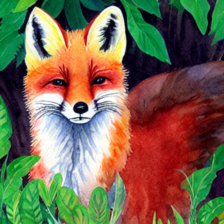

예측 결과: dog


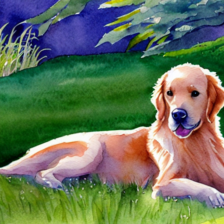

예측 결과: dog


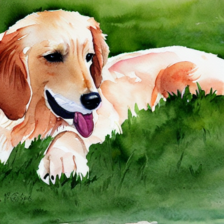

예측 결과: fox


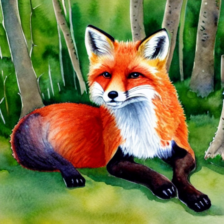

테스트 데이터셋에서 모델 정확도: 100.00%


In [ ]:
# --- 이미지 역정규화(Denormalization) 함수 ---
# 모델 입력에 맞게 정규화했던 이미지를 다시 사람이 볼 수 있는 [0, 1] 범위로 되돌리는 함수입니다.
# ImageNet 정규화 값 (전처리에서 썼던 값과 맞춰주세요)
mean = [0.485, 0.456, 0.406]
std  = [0.229, 0.224, 0.225]

## denormalization (역정규화) 함수
def denormalize(img_tensor, mean=mean, std=std):
    """
    img_tensor: (C,H,W), torch.Tensor, [normalized]
    return: (C,H,W) in [0,1]
    """
    mean = torch.tensor(mean, device=img_tensor.device).view(-1, 1, 1)
    std = torch.tensor(std, device=img_tensor.device).view(-1, 1, 1)
    img = img_tensor * std + mean

    # .clamp(0, 1): 텐서의 모든 값을 0과 1 사이로 제한합니다.
    return img.clamp(0, 1)


# --- 모델 평가 ---
# .eval(): 모델을 평가 모드로 설정합니다.
model.eval()
correct = 0
total = 0
with torch.no_grad():

    # test_loader에서 테스트 데이터를 가져옵니다.
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)

        # .argmax(dim=1): 가장 높은 확률을 가진 클래스의 인덱스를 예측 결과로 선택합니다.
        predicted = outputs.argmax(dim=1)

        total += labels.size(0) # 전체 개수 누적
        correct += (predicted == labels).sum().item() # 예측과 정답이 일치하는 개수 누적

        # --- 예측 결과 시각화 ---
        for img, pred in zip(inputs, predicted):

            # 이미지를 역정규화하고 CPU로 옮깁니다.
            _img = denormalize(img).cpu()

            # 예측된 클래스 이름을 출력합니다.
            print(f"예측 결과: {train_dataset.classes[pred]}")

            # 역정규화된 이미지를 PIL 이미지로 변환하여 출력합니다.
            display(transforms.ToPILImage()(_img))

print(f"테스트 데이터셋에서 모델 정확도: {100 * correct / total:.2f}%")

이 실습을 통해, 생성된 데이터를 활용한 모델의 전이 학습 (리니어 프로빙) 과정을 경험해보았습니다.
요약하면 사전학습된 ResNet18을 불러와 출력 계층을 커스터마이징하고, Stable Diffusion으로 생성한 합성 데이터셋으로 학습시킴으로써 모델이 새로운 이미지를 분류하도록 만들었습니다. 실제 현업에서는 이 방법을 데이터 증강이나 새로운 클래스 추가에 활용할 수 있습니다.


# **마치며**

이번 실습에서는 텍스트-투-이미지 생성부터, 생성된 이미지를 CLIP으로 평가하고, 기존 CNN 모델(ResNet)과 비교해보았으며, 나아가 생성 데이터로 모델을 전이 학습 (리니어 프로빙)하는 일련의 과정을 구현했습니다. 이러한 흐름을 통해 딥러닝 모델의 생성과 인식 능력을 모두 체험하고, 각 기법의 특징을 이해할 수 있었습니다.